<a href="https://colab.research.google.com/github/dmc2015/ds-shared/blob/main/avg_weighted_popularity_combo_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Average Weighted + Popularity  Recommendation Engine


Summary

In this data set example we create an attribute that can act as a weighted score. With this weighted score we will be able to caclcualte the most best movies. After calculating and making recommendations based on this weighted score we will use an existing feature `popularity`, in conjunction with `weighted_score` to make precdictions.

The data set is from [TMDB](https://www.themoviedb.org)

### Average weighted model
this takes several features from the data set and calcualtes them to determine a `weighted_score` for each movie.

```
V = x["vote_count"]
R = x["vote_average"]
return ((R*V) + (VoteAvg * m)) / ( V + m)
```

that equates to a rating for the movie and average's that feature among, for this model we will use the `vote_count` as the threshold. The threshold will be used to filter out potential recommendations that to do not have an adequate amount of votes from users.

The average weight model will be made up of several different factors:
- Threshold - the value at which we require a potential recommendation to reach to be considered, those not considered will be filtered out
- Amount of Votes - used in calculating the `weighted_score`
- Average Overall vote  - used in calculating the `weighted_score`
- Average individual vote for a movie  - used in calculating the `weighted_score`
- Average Weight (`vote_average`): average vote of all the votes casted for a given movie, used in calculating the `weighted_score`







## Imports
*Making the required imports to create and run the model*

In [ ]:
! pip install googledrivedownloader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_drive_downloader import GoogleDriveDownloader as gdd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Google Drive Import and Download & Data Access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

gdd.download_file_from_google_drive(file_id='1_U1U6dF74DrHBi00giHHLDN-49q1vpRd',
                                    dest_path='./sample_data/cleaned.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Creating the Data Frame From A CSV

In [ ]:
df = pd.read_csv("sample_data/cleaned.csv")

## Data Exploration
Here we are looking at varying aspects of the data, columns/features, the shape of the data & data attributes that we have data frame.

In [ ]:
df.head()

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

## Selecting Elements of Our Weighted Algorithm

In [ ]:
vote_count = df['vote_count'] 
VoteAvg = df['vote_average'].mean()
R = df['vote_average']

In [ ]:
print(VoteAvg)

6.092171559442016


## Finding a Threshold

We want to select a threshold that includes the bulk of the records and that leaves out outliers. We do this so the results of the model do are not skewed by outliers. We can use a box plot model to try to visualize this.

We can expect the threshold to be close to 2000, based on the visualization.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


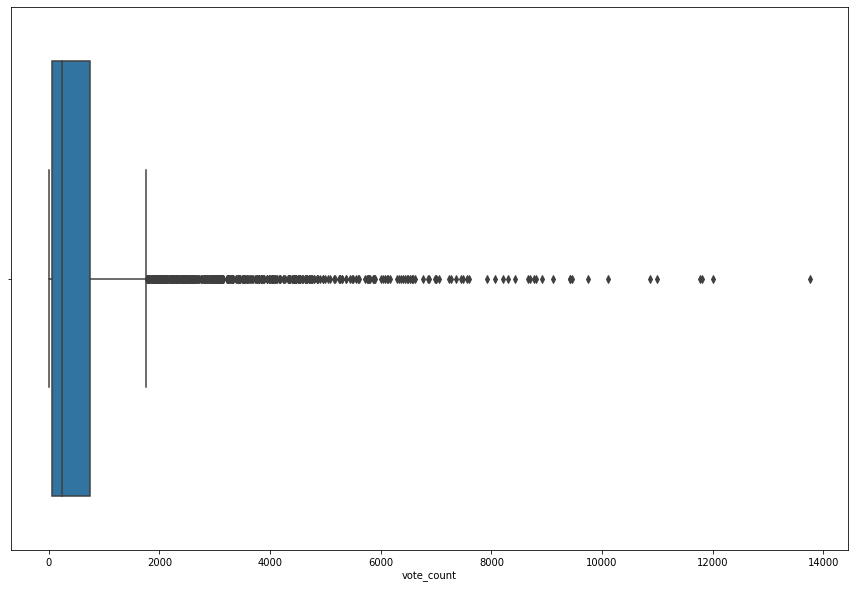

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df['vote_count'])

### We can see the shape of the original data set and see how filteirng based on this threshold will impact the dataset.

In [ ]:
df.shape

(4803, 19)

In [ ]:
(df[df['vote_count'] > df['vote_count'].quantile(.9)]).shape

(481, 19)

We see that we will have 481 records left after applying the threshold. 
Now lets actually apply it.

In [ ]:
threshold = df['vote_count'].quantile(.9)
threshold

1838.4000000000015

## Using The Threshold
Here we take the threshold value and we filter the data frame to only values that are greater than the threshold (1838)

In [ ]:
data = df[df['vote_count'] > threshold]

## The Model

Now we create the model that will calculate the average weighted score.


- Multiply the average vote (average of for the whole dataset) by the threshold

- Multipley the vote average of each individual record to its cooresponding vote count of the same record.

- Add the result of the two previous values

- Divide it by the value of adding the count of the vote & threshold.






In [ ]:
def avg_weighted_score(x, m=threshold, VoteAvg=VoteAvg):
  V = x["vote_count"]
  R = x["vote_average"]
  return ((R*V) + (VoteAvg * m)) / ( V + m)
    

### We apply this model to our dataframe and put the result in to a new feature `weighted_score` and then we sort the data frame based on that score.

In [ ]:
data['weighted_score'] = data.apply(avg_weighted_score, axis=1)
sorted_data = data.sort_values('weighted_score', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sorted_data.head(3)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_score
1881,1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020


## These are the top 5 movies based on our `weighted_score`

In [ ]:
sorted_data[['original_title', 'weighted_score', 'tagline', 'popularity']].head(5)

,original_title,weighted_score,tagline,popularity
1881,The Shawshank Redemption,8.059258,Fear can hold you prisoner. Hope can set you f...,136.747729
662,Fight Club,7.939256,Mischief. Mayhem. Soap.,146.757391
65,The Dark Knight,7.920020,Why So Serious?,187.322927
3232,Pulp Fiction,7.904645,Just because you are a character doesn't mean ...,121.463076
96,Inception,7.863239,Your mind is the scene of the crime.,167.583710


Text(0, 0.5, 'Movie title')

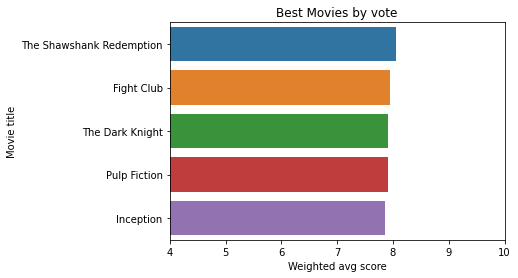

In [ ]:
sns.barplot(x=sorted_data['weighted_score'].head(5), y=sorted_data['original_title'].head(5), data=sorted_data)
plt.xlim(4, 10)
plt.title('Best Movies by vote')
plt.xlabel('Weighted avg score')
plt.ylabel('Movie title')

# Creating A Subset of our Dataframe, focused on Popularity
Now we will create another dataframe that targest popularity

In [ ]:
popularity = data[['original_title', 'weighted_score', 'popularity', 'vote_count', 'vote_average']].sort_values(["popularity"], ascending=False)

In [ ]:
popularity

,original_title,weighted_score,popularity,vote_count,vote_average
546,Minions,6.311706,875.581305,4571,6.4
95,Interstellar,7.809479,724.247784,10867,8.1
788,Deadpool,7.212652,514.569956,10995,7.4
94,Guardians of the Galaxy,7.613005,481.098624,9742,7.9
127,Mad Max: Fury Road,7.019214,434.278564,9427,7.2
...,...,...,...,...,...
101,X-Men: First Class,6.836047,3.195174,5181,7.1
203,X2,6.556517,2.871739,3506,6.8
508,The Lost World: Jurassic Park,6.154170,2.502487,2487,6.2
2511,Home Alone,6.664295,2.186927,2414,7.1


Create a copy of popularity `pop` for the purpose of a data visualization with indices

In [ ]:
pop = popularity[['original_title', 'weighted_score', 'popularity', 'vote_count', 'vote_average']]

In [ ]:
pop

,original_title,weighted_score,popularity,vote_count,vote_average
546,Minions,6.311706,875.581305,4571,6.4
95,Interstellar,7.809479,724.247784,10867,8.1
788,Deadpool,7.212652,514.569956,10995,7.4
94,Guardians of the Galaxy,7.613005,481.098624,9742,7.9
127,Mad Max: Fury Road,7.019214,434.278564,9427,7.2
...,...,...,...,...,...
101,X-Men: First Class,6.836047,3.195174,5181,7.1
203,X2,6.556517,2.871739,3506,6.8
508,The Lost World: Jurassic Park,6.154170,2.502487,2487,6.2
2511,Home Alone,6.664295,2.186927,2414,7.1


## Creating a Histogram to show the movies with the largest popularity

Text(0, 0.5, 'popularity')

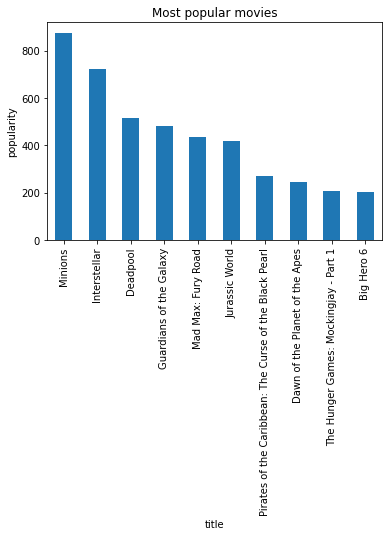

In [ ]:
pop.set_index('original_title')['popularity'].nlargest(10).plot(kind='bar')
plt.title('Most popular movies')
plt.xlabel('title')
plt.ylabel('popularity')

### Use the Scaler
We use a scaler to modulate outliers in our data set that we want to keep in our data set but we don't want to filter out.

We will now have a combination of model using popularity score and weighted average. It's possible that the range of the popularity score and the weighted average have a vastly different range in values, without scaling our two key metrics for the model it's possible that one of the metrics could heavily skew the results.

*The scaler will help mitigate this effect, to help normalize the data, so that one value is not significantly skewing our model.*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaling = MinMaxScaler()
popularity[['weighted_score', 'popularity']]

,weighted_score,popularity
546,6.311706,875.581305
95,7.809479,724.247784
788,7.212652,514.569956
94,7.613005,481.098624
127,7.019214,434.278564
...,...,...
101,6.836047,3.195174
203,6.556517,2.871739
508,6.154170,2.502487
2511,6.664295,2.186927


In [ ]:
df_scaled = scaling.fit_transform(popularity[['weighted_score', 'popularity']])

In [ ]:
popularity[['weighted_avg_scaled', 'popularity_scaled']] = df_scaled

In [ ]:
popularity.head(2)

,original_title,weighted_score,popularity,vote_count,vote_average,weighted_avg_scaled,popularity_scaled
546,Minions,6.311706,875.581305,4571,6.4,0.398128,1.000000
95,Interstellar,7.809479,724.247784,10867,8.1,0.913974,0.826794


Now we specify the percentage that we want each value to have when recommending a movie (50%) and we add that as the `score_mix` feature.

In [ ]:
popularity['score_mix'] = (popularity['weighted_avg_scaled'] * 0.5) + (popularity['popularity_scaled'] * 0.5)

In [ ]:
popularity

,original_title,weighted_score,popularity,vote_count,vote_average,weighted_avg_scaled,popularity_scaled,score_mix
546,Minions,6.311706,875.581305,4571,6.4,0.398128,1.000000,0.699064
95,Interstellar,7.809479,724.247784,10867,8.1,0.913974,0.826794,0.870384
788,Deadpool,7.212652,514.569956,10995,7.4,0.708422,0.586812,0.647617
94,Guardians of the Galaxy,7.613005,481.098624,9742,7.9,0.846307,0.548503,0.697405
127,Mad Max: Fury Road,7.019214,434.278564,9427,7.2,0.641800,0.494916,0.568358
...,...,...,...,...,...,...,...,...
101,X-Men: First Class,6.836047,3.195174,5181,7.1,0.578716,0.001529,0.290122
203,X2,6.556517,2.871739,3506,6.8,0.482443,0.001159,0.241801
508,The Lost World: Jurassic Park,6.154170,2.502487,2487,6.2,0.343871,0.000736,0.172304
2511,Home Alone,6.664295,2.186927,2414,7.1,0.519563,0.000375,0.259969


In [ ]:
popularity.shape

(481, 8)

### Now we sort and grab the top 10 most recommended movies based on popularity and the calculated weighted score.

In [ ]:
popularity_sorted = popularity.sort_values('score_mix', ascending=False)

In [ ]:
popularity_sorted[0:10]

,original_title,weighted_score,popularity,vote_count,vote_average,weighted_avg_scaled,popularity_scaled,score_mix
95,Interstellar,7.809479,724.247784,10867,8.1,0.913974,0.826794,0.870384
546,Minions,6.311706,875.581305,4571,6.4,0.398128,1.000000,0.699064
94,Guardians of the Galaxy,7.613005,481.098624,9742,7.9,0.846307,0.548503,0.697405
788,Deadpool,7.212652,514.569956,10995,7.4,0.708422,0.586812,0.647617
65,The Dark Knight,7.920020,187.322927,12002,8.2,0.952045,0.212268,0.582157
1881,The Shawshank Redemption,8.059258,136.747729,8205,8.5,1.000000,0.154384,0.577192
127,Mad Max: Fury Road,7.019214,434.278564,9427,7.2,0.641800,0.494916,0.568358
662,Fight Club,7.939256,146.757391,9413,8.3,0.958670,0.165840,0.562255
96,Inception,7.863239,167.583710,13752,8.1,0.932490,0.189676,0.561083
3337,The Godfather,7.851236,143.659698,5893,8.4,0.928356,0.162295,0.545325


In [ ]:
import plotly.express as px

In [ ]:
px.bar(x=popularity_sorted[0:10]['original_title'], y=popularity_sorted[0:10]['score_mix'])